## PEAR Training Experiment

This is a notebook where we train two models with different PEAR loss hyperparamters and compare their performance and consistency metrics.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch.optim import AdamW

import pear

In [7]:
# Define constants
dataset = "californiahousing"
batch_size = 64
model_cfg = {"name": "mlp",
             "width": 100,
             "depth": 3}
lr = 5e-4
weight_decay = 2e-4
explainers = ["vanilla_gradients", "integrated_gradients"]
disagreement_mu = 0.5

In [8]:
loader_train, loader_test, num_classes = pear.get_data(dataset,
                                                       batch_size,
                                                       data_path="../datasets")
input_dim = loader_train.dataset.data.shape[1]
num_training_data = loader_train.dataset.data.shape[0]
num_testing_data = loader_test.dataset.data.shape[0]
print(f"{dataset} dataset with {num_training_data} training samples and {num_testing_data} testing samples"
      f" and {input_dim} features and "
      f"{torch.unique(torch.tensor(loader_train.dataset.targets), return_counts=True)} classes.")

californiahousing dataset with 15475 training samples and 5159 testing samples and 8 features and (tensor([0, 1]), tensor([7686, 7789])) classes.


In [9]:
# create a model trained with pear (lambda = 0.5)
disagreement_lambda = 0.5
epochs = 50

model_pear = pear.get_model(model_cfg, input_dim, num_classes)
pytorch_total_params = sum(p.numel() for p in model_pear.parameters())
print(f"This {model_cfg['name']} has {pytorch_total_params / 1e3:0.3f} thousand parameters.")

This mlp has 21.302 thousand parameters.


In [10]:
# get an optimizer
params = model_pear.parameters()
optim = AdamW(params, lr=lr, weight_decay=weight_decay)

# create two explainers for the loss
explainer_a = pear.get_explainer(explainers[0], model_pear, torch.tensor(loader_train.dataset.data))
explainer_b = pear.get_explainer(explainers[1], model_pear, torch.tensor(loader_train.dataset.data))
disagreement_loss_fn = pear.DisagreementLoss(explainer_a, explainer_b, disagreement_mu)

In [11]:
for epoch in range(epochs):
    _ = model_pear.train_loop(trainloader=loader_train,
                              disagreement_lambda=disagreement_lambda,
                              optimizer=optim,
                              task_loss_fn=torch.nn.CrossEntropyLoss(),
                              disagreement_loss_fn=disagreement_loss_fn)
    evaluation_on_train_data = model_pear.evaluate_balanced(loader_train,
                                                            task_loss_fn=torch.nn.CrossEntropyLoss(),
                                                            disagreement_loss_fn=disagreement_loss_fn)
    evaluation_on_test_data = model_pear.evaluate_balanced(loader_test,
                                                           task_loss_fn=torch.nn.CrossEntropyLoss(),
                                                           disagreement_loss_fn=disagreement_loss_fn)

    print(f"epoch {epoch:2d} | "
          f"task loss {evaluation_on_train_data['task_loss']:.4f} | "
          f"disagree loss {evaluation_on_train_data['disagreement_loss']:.4f} | "
          f"train bal acc {(evaluation_on_train_data['acc_0'] + evaluation_on_train_data['acc_1']) / 2:.2f} | "
          f"test bal acc {(evaluation_on_test_data['acc_0'] + evaluation_on_test_data['acc_1']) / 2:.2f} | "
          )

epoch  0 | task loss 0.4209 | disagree loss 0.0029 | train bal acc 79.58 | test bal acc 80.26 | 


epoch  1 | task loss 0.4031 | disagree loss 0.0022 | train bal acc 80.73 | test bal acc 81.30 | 


epoch  2 | task loss 0.4015 | disagree loss 0.0025 | train bal acc 81.05 | test bal acc 81.11 | 


epoch  3 | task loss 0.3984 | disagree loss 0.0024 | train bal acc 81.25 | test bal acc 81.29 | 


epoch  4 | task loss 0.3991 | disagree loss 0.0027 | train bal acc 81.15 | test bal acc 80.78 | 


epoch  5 | task loss 0.3934 | disagree loss 0.0021 | train bal acc 81.35 | test bal acc 81.91 | 


epoch  6 | task loss 0.3920 | disagree loss 0.0024 | train bal acc 81.45 | test bal acc 81.69 | 


epoch  7 | task loss 0.3908 | disagree loss 0.0021 | train bal acc 81.61 | test bal acc 81.88 | 


epoch  8 | task loss 0.4081 | disagree loss 0.0026 | train bal acc 80.86 | test bal acc 79.29 | 


epoch  9 | task loss 0.3927 | disagree loss 0.0023 | train bal acc 81.43 | test bal acc 81.88 | 


epoch 10 | task loss 0.3934 | disagree loss 0.0031 | train bal acc 81.45 | test bal acc 81.85 | 


epoch 11 | task loss 0.3924 | disagree loss 0.0028 | train bal acc 81.61 | test bal acc 80.97 | 


epoch 12 | task loss 0.3878 | disagree loss 0.0027 | train bal acc 81.93 | test bal acc 82.19 | 


epoch 13 | task loss 0.3954 | disagree loss 0.0035 | train bal acc 81.35 | test bal acc 80.42 | 


epoch 14 | task loss 0.3852 | disagree loss 0.0030 | train bal acc 82.08 | test bal acc 82.19 | 


epoch 15 | task loss 0.3866 | disagree loss 0.0026 | train bal acc 81.81 | test bal acc 81.65 | 


epoch 16 | task loss 0.3900 | disagree loss 0.0030 | train bal acc 81.69 | test bal acc 82.22 | 


epoch 17 | task loss 0.3846 | disagree loss 0.0033 | train bal acc 82.00 | test bal acc 82.46 | 


epoch 18 | task loss 0.3823 | disagree loss 0.0044 | train bal acc 82.26 | test bal acc 82.25 | 


epoch 19 | task loss 0.3825 | disagree loss 0.0044 | train bal acc 82.19 | test bal acc 81.91 | 


epoch 20 | task loss 0.3817 | disagree loss 0.0035 | train bal acc 82.11 | test bal acc 82.03 | 


epoch 21 | task loss 0.3802 | disagree loss 0.0039 | train bal acc 82.29 | test bal acc 82.09 | 


epoch 22 | task loss 0.3805 | disagree loss 0.0052 | train bal acc 82.22 | test bal acc 81.54 | 


epoch 23 | task loss 0.3781 | disagree loss 0.0044 | train bal acc 82.50 | test bal acc 82.09 | 


epoch 24 | task loss 0.3780 | disagree loss 0.0051 | train bal acc 82.53 | test bal acc 81.99 | 


epoch 25 | task loss 0.3787 | disagree loss 0.0060 | train bal acc 82.40 | test bal acc 81.30 | 


epoch 26 | task loss 0.3821 | disagree loss 0.0058 | train bal acc 82.30 | test bal acc 82.62 | 


epoch 27 | task loss 0.3774 | disagree loss 0.0057 | train bal acc 82.40 | test bal acc 81.29 | 


epoch 28 | task loss 0.3726 | disagree loss 0.0064 | train bal acc 82.79 | test bal acc 82.56 | 


epoch 29 | task loss 0.3724 | disagree loss 0.0059 | train bal acc 82.88 | test bal acc 81.75 | 


epoch 30 | task loss 0.3716 | disagree loss 0.0079 | train bal acc 82.69 | test bal acc 81.96 | 


epoch 31 | task loss 0.3666 | disagree loss 0.0067 | train bal acc 83.03 | test bal acc 82.73 | 


epoch 32 | task loss 0.3700 | disagree loss 0.0068 | train bal acc 82.87 | test bal acc 81.42 | 


epoch 33 | task loss 0.3744 | disagree loss 0.0075 | train bal acc 82.55 | test bal acc 83.33 | 


epoch 34 | task loss 0.3620 | disagree loss 0.0073 | train bal acc 83.32 | test bal acc 82.72 | 


epoch 35 | task loss 0.3600 | disagree loss 0.0079 | train bal acc 83.31 | test bal acc 82.88 | 


epoch 36 | task loss 0.3637 | disagree loss 0.0080 | train bal acc 83.06 | test bal acc 81.80 | 


epoch 37 | task loss 0.3614 | disagree loss 0.0081 | train bal acc 83.05 | test bal acc 83.76 | 


epoch 38 | task loss 0.3635 | disagree loss 0.0083 | train bal acc 83.21 | test bal acc 81.78 | 


epoch 39 | task loss 0.3598 | disagree loss 0.0084 | train bal acc 83.29 | test bal acc 82.34 | 


epoch 40 | task loss 0.3574 | disagree loss 0.0076 | train bal acc 83.38 | test bal acc 82.29 | 


epoch 41 | task loss 0.3654 | disagree loss 0.0079 | train bal acc 82.96 | test bal acc 81.42 | 


epoch 42 | task loss 0.3556 | disagree loss 0.0103 | train bal acc 83.60 | test bal acc 83.16 | 


epoch 43 | task loss 0.3568 | disagree loss 0.0101 | train bal acc 83.20 | test bal acc 83.88 | 


epoch 44 | task loss 0.3623 | disagree loss 0.0077 | train bal acc 83.02 | test bal acc 81.28 | 


epoch 45 | task loss 0.3555 | disagree loss 0.0091 | train bal acc 83.48 | test bal acc 83.43 | 


epoch 46 | task loss 0.3522 | disagree loss 0.0082 | train bal acc 83.51 | test bal acc 83.01 | 


epoch 47 | task loss 0.3521 | disagree loss 0.0082 | train bal acc 83.62 | test bal acc 83.28 | 


epoch 48 | task loss 0.3570 | disagree loss 0.0086 | train bal acc 83.45 | test bal acc 83.36 | 


epoch 49 | task loss 0.3530 | disagree loss 0.0085 | train bal acc 83.59 | test bal acc 84.05 | 


In [12]:
# create a second model with a different lambda
disagreement_lambda = 0.0
epochs = 30

model_vanilla = pear.get_model(model_cfg, input_dim, num_classes)
pytorch_total_params = sum(p.numel() for p in model_vanilla.parameters())
print(f"This {model_cfg['name']} has {pytorch_total_params / 1e3:0.3f} thousand parameters.")

This mlp has 21.302 thousand parameters.


In [13]:
# get an optimizer
params = model_vanilla.parameters()
optim = AdamW(params, lr=lr, weight_decay=weight_decay)

# create two explainers for the loss
explainer_a = pear.get_explainer(explainers[0], model_vanilla, torch.tensor(loader_train.dataset.data))
explainer_b = pear.get_explainer(explainers[1], model_vanilla, torch.tensor(loader_train.dataset.data))

In [14]:
for epoch in range(epochs):
    _ = model_vanilla.train_loop(trainloader=loader_train,
                                 disagreement_lambda=disagreement_lambda,
                                 optimizer=optim,
                                 task_loss_fn=torch.nn.CrossEntropyLoss(),
                                 disagreement_loss_fn=disagreement_loss_fn)
    evaluation_on_train_data = model_vanilla.evaluate_balanced(loader_train,
                                                               task_loss_fn=torch.nn.CrossEntropyLoss(),
                                                               disagreement_loss_fn=disagreement_loss_fn)
    evaluation_on_test_data = model_vanilla.evaluate_balanced(loader_test,
                                                              task_loss_fn=torch.nn.CrossEntropyLoss(),
                                                              disagreement_loss_fn=disagreement_loss_fn)

    print(f"epoch {epoch:2d} | "
          f"task loss {evaluation_on_train_data['task_loss']:.4f} | "
          f"disagree loss {evaluation_on_train_data['disagreement_loss']:.4f} | "
          f"train bal acc {(evaluation_on_train_data['acc_0'] + evaluation_on_train_data['acc_1']) / 2:.2f} | "
          f"test bal acc {(evaluation_on_test_data['acc_0'] + evaluation_on_test_data['acc_1']) / 2:.2f} | "
          )

epoch  0 | task loss 0.4183 | disagree loss 0.0085 | train bal acc 79.77 | test bal acc 79.83 | 


epoch  1 | task loss 0.3960 | disagree loss 0.0085 | train bal acc 81.47 | test bal acc 81.81 | 


epoch  2 | task loss 0.3944 | disagree loss 0.0085 | train bal acc 81.36 | test bal acc 82.31 | 


epoch  3 | task loss 0.3874 | disagree loss 0.0085 | train bal acc 82.54 | test bal acc 82.24 | 


epoch  4 | task loss 0.3827 | disagree loss 0.0085 | train bal acc 82.38 | test bal acc 83.21 | 


epoch  5 | task loss 0.3802 | disagree loss 0.0085 | train bal acc 82.44 | test bal acc 83.24 | 


epoch  6 | task loss 0.3829 | disagree loss 0.0085 | train bal acc 82.76 | test bal acc 81.72 | 


epoch  7 | task loss 0.3797 | disagree loss 0.0085 | train bal acc 82.45 | test bal acc 83.57 | 


epoch  8 | task loss 0.3707 | disagree loss 0.0085 | train bal acc 83.16 | test bal acc 83.40 | 


epoch  9 | task loss 0.3686 | disagree loss 0.0085 | train bal acc 83.63 | test bal acc 82.93 | 


epoch 10 | task loss 0.3669 | disagree loss 0.0085 | train bal acc 83.53 | test bal acc 82.74 | 


epoch 11 | task loss 0.3672 | disagree loss 0.0085 | train bal acc 83.62 | test bal acc 82.90 | 


epoch 12 | task loss 0.3646 | disagree loss 0.0085 | train bal acc 83.29 | test bal acc 84.20 | 


epoch 13 | task loss 0.3561 | disagree loss 0.0085 | train bal acc 84.13 | test bal acc 83.89 | 


epoch 14 | task loss 0.3579 | disagree loss 0.0085 | train bal acc 83.86 | test bal acc 83.03 | 


epoch 15 | task loss 0.3527 | disagree loss 0.0085 | train bal acc 84.04 | test bal acc 84.53 | 


epoch 16 | task loss 0.3601 | disagree loss 0.0085 | train bal acc 83.52 | test bal acc 82.32 | 


epoch 17 | task loss 0.3449 | disagree loss 0.0085 | train bal acc 84.43 | test bal acc 84.48 | 


epoch 18 | task loss 0.3720 | disagree loss 0.0085 | train bal acc 82.97 | test bal acc 83.84 | 


epoch 19 | task loss 0.3407 | disagree loss 0.0085 | train bal acc 84.69 | test bal acc 84.64 | 


epoch 20 | task loss 0.3357 | disagree loss 0.0085 | train bal acc 85.08 | test bal acc 84.59 | 


epoch 21 | task loss 0.3343 | disagree loss 0.0085 | train bal acc 84.92 | test bal acc 84.81 | 


epoch 22 | task loss 0.3301 | disagree loss 0.0085 | train bal acc 85.27 | test bal acc 84.91 | 


epoch 23 | task loss 0.3385 | disagree loss 0.0085 | train bal acc 84.63 | test bal acc 83.74 | 


epoch 24 | task loss 0.3392 | disagree loss 0.0085 | train bal acc 84.46 | test bal acc 83.57 | 


epoch 25 | task loss 0.3248 | disagree loss 0.0085 | train bal acc 85.49 | test bal acc 85.06 | 


epoch 26 | task loss 0.3263 | disagree loss 0.0085 | train bal acc 85.27 | test bal acc 84.80 | 


epoch 27 | task loss 0.3197 | disagree loss 0.0085 | train bal acc 85.77 | test bal acc 85.08 | 


epoch 28 | task loss 0.3205 | disagree loss 0.0085 | train bal acc 85.49 | test bal acc 85.16 | 


epoch 29 | task loss 0.3219 | disagree loss 0.0085 | train bal acc 85.46 | test bal acc 84.90 | 


In [15]:
metric = "pairwise_rank"
red_grid_data_pear = pear.disagreement_matrices(model_pear, loader_train, loader_test, k=5, metric=metric)
red_grid_data_vanilla = pear.disagreement_matrices(model_vanilla, loader_train, loader_test, k=5, metric=metric)

explainer_indices = {"vanilla_gradients": 2,
                     "integrated_gradients": 4,
                     "shap": 1,
                     "lime": 0,
                     "input_x_gradient": 3,
                     "smooth_grad": 5}

explainer_pairs = [
    "input_x_gradient_v_input_x_gradient",
    "input_x_gradient_v_integrated_gradients",
    "input_x_gradient_v_lime",
    "input_x_gradient_v_shap",
    "input_x_gradient_v_smooth_grad",
    "input_x_gradient_v_vanilla_gradients",
    "integrated_gradients_v_integrated_gradients",
    "integrated_gradients_v_lime",
    "integrated_gradients_v_shap",
    "integrated_gradients_v_smooth_grad",
    "integrated_gradients_v_vanilla_gradients",
    "lime_v_lime",
    "lime_v_shap",
    "lime_v_smooth_grad",
    "lime_v_vanilla_gradients",
    "shap_v_shap",
    "shap_v_smooth_grad",
    "shap_v_vanilla_gradients",
    "smooth_grad_v_smooth_grad",
    "smooth_grad_v_vanilla_gradients",
    "vanilla_gradients_v_vanilla_gradients",
]

/Users/avi/.pyenv/versions/pear/lib/python3.10/site-packages/captum/attr/_core/lime.py:1115: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  warnings.warn(
/Users/avi/.pyenv/versions/pear/lib/python3.10/site-packages/captum/attr/_core/lime.py:1115: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  warnings.warn(
/Users/avi/.pyenv/versions/pear/lib/python3.10/site-packages/captum/attr/_core/lime.py:1115: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to comput

In [16]:
metric_strs = {
    "feature_agreement": "Feature Agreement",
    "rank_agreement": "Rank Agreement",
    "sign_agreement": "Sign Agreement",
    "signed_rank_agreement": "Signed Rank Agreement",
    "rank_correlation": "Rank Correlation",
    "pairwise_rank": "Pairwise Rank Agreement",
}

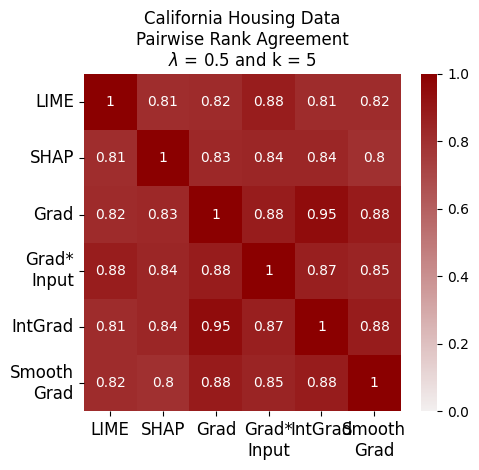

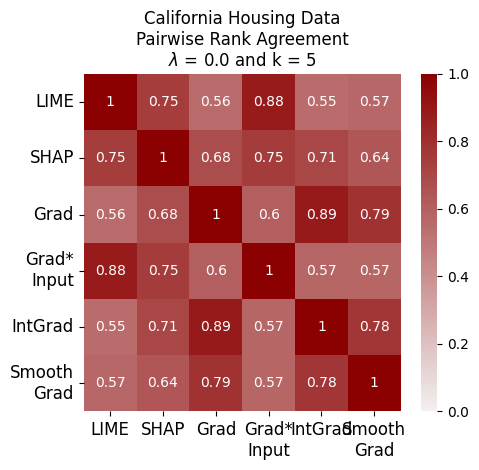

In [17]:
cmap = sns.color_palette("light:darkred", as_cmap=True)
metric = "pairwise_rank"
fs = 12
tables = [red_grid_data_pear, red_grid_data_vanilla]
lams = [0.5, 0.0]
for table, lam in zip(tables, lams):
    to_plot = np.zeros((len(explainer_indices.keys()), len(explainer_indices.keys())))
    for explainer_pair in explainer_pairs:
        exs = explainer_pair.split("_v_")
        to_plot[explainer_indices[exs[0]], explainer_indices[exs[1]]] = table[metric][explainer_pair]
        to_plot[explainer_indices[exs[1]], explainer_indices[exs[0]]] = table[metric][explainer_pair]

    fig, ax = plt.subplots(figsize=(5, 4.8))
    if "correlation" in metric:
        sns.heatmap(to_plot, vmin=-1, vmax=1, cmap=cmap, ax=ax, annot=True)
        title = f"California Housing Data\n{metric_strs[metric]}\n$\lambda$ = {lam}"
    else:
        sns.heatmap(to_plot, vmin=0, vmax=1, cmap=cmap, ax=ax, annot=True)
        title = f"California Housing Data\n{metric_strs[metric]}\n$\lambda$ = {lam} and k = {5}"
    ax.set_title(title, fontsize=fs)

    ax.set_xticks([0 + 0.5, 1 + 0.5, 2 + 0.5, 3 + 0.5, 4 + 0.5, 5 + 0.5],
                  ["LIME", "SHAP", "Grad", "Grad*\nInput", "IntGrad", "Smooth\nGrad"],
                  rotation=0,
                  fontsize=fs)
    ax.set_yticks([0 + 0.5, 1 + 0.5, 2 + 0.5, 3 + 0.5, 4 + 0.5, 5 + 0.5],
                  ["LIME", "SHAP", "Grad", "Grad*\nInput", "IntGrad", "Smooth\nGrad"],
                  rotation=0,
                  fontsize=fs)
    plt.tight_layout()
plt.show()

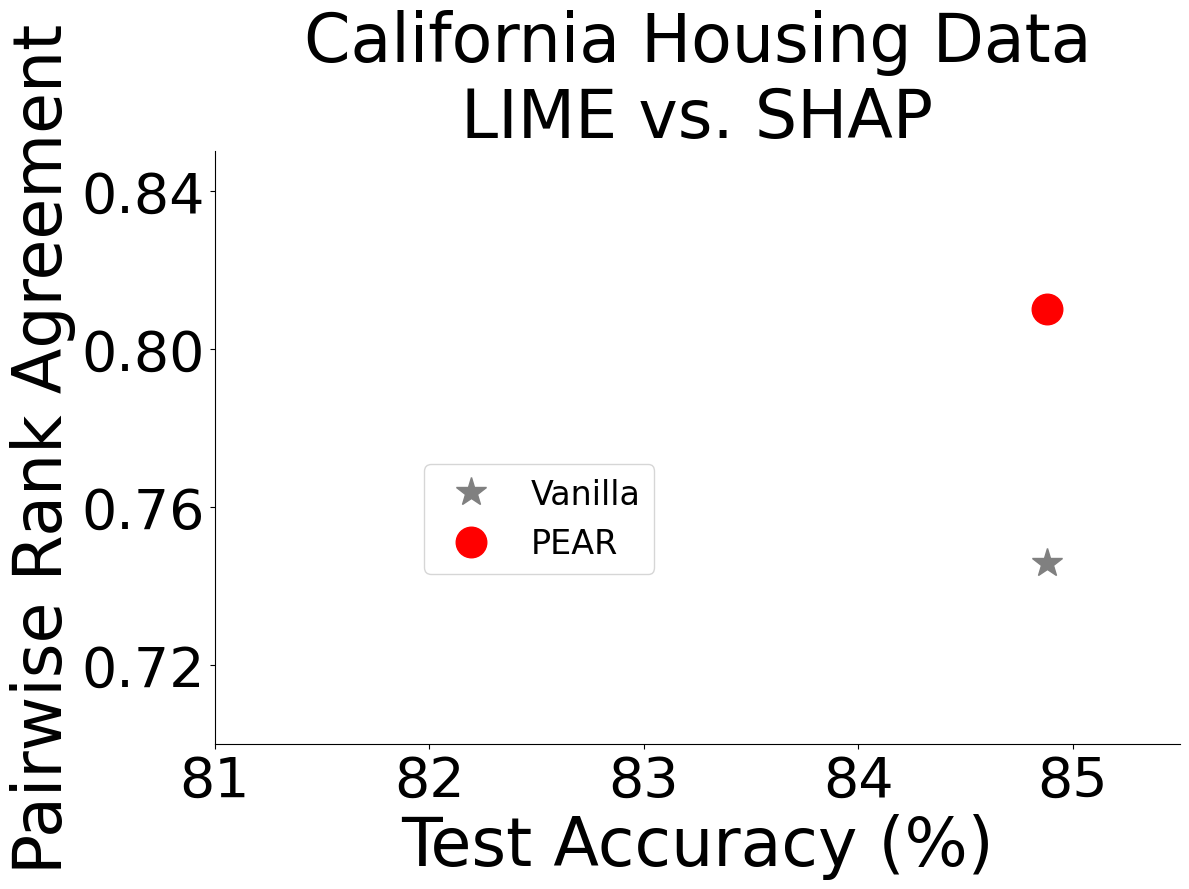

In [18]:
fig, ax = plt.subplots(figsize=(12, 9))
title = f"California Housing Data\nLIME vs. SHAP"
fs = 48
ax.set_title(title, fontsize=fs)

vanilla_acc = model_vanilla.evaluate(loader_test,
                                     task_loss_fn=torch.nn.CrossEntropyLoss(),
                                     disagreement_loss_fn=disagreement_loss_fn)["acc"]
vanilla_agreement = red_grid_data_vanilla[metric]["lime_v_shap"]
ax.plot([vanilla_acc], [vanilla_agreement],
        marker="*",
        markersize=22,
        linestyle="none",
        color="grey",
        label="Vanilla")

pear_acc = model_vanilla.evaluate(loader_test,
                                  task_loss_fn=torch.nn.CrossEntropyLoss(),
                                  disagreement_loss_fn=disagreement_loss_fn)["acc"]
pear_agreement = red_grid_data_pear[metric]["lime_v_shap"]
ax.plot([pear_acc], [pear_agreement],
        marker="o",
        markersize=22,
        linestyle="none",
        color="red",
        label="PEAR")

ax.set_xlim([81, 85.5])
x = np.arange(81, 86, 1)
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=fs, rotation=0)
ax.tick_params(axis='x', labelsize=fs - 8)
ax.set_xlabel("Test Accuracy (%)", fontsize=fs)

ax.set_ylim([0.7, 0.85])
y = np.arange(0.72, 0.85, 0.04)
ax.set_yticks(y)
ax.set_yticklabels([f"{i:0.2f}" for i in y], fontsize=fs, rotation=0)
ax.tick_params(axis='y', labelsize=fs - 8)
ax.set_ylabel(f"{metric_strs[metric]}", fontsize=fs)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(loc='upper left', bbox_to_anchor=(0.2, 0.5), fontsize=fs / 2)
plt.tight_layout()
plt.show()